# Customer Segmentation for E-commerce Personalization

In [1]:
# import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [2]:
ret=pd.read_excel('Online Retail.xlsx')
ret.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
ret_on_df=ret.copy()

## Data Preparation

In [4]:
ret_on_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# shape of the dataset
ret_on_df.shape

(541909, 8)

#### The Coulmns Names in Dataset

In [6]:
ret_on_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### Check Data types of columns

In [7]:
ret_on_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
ret_on_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### Check Columns With Missing values

In [10]:
ret_on_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

###### Insight: There missing values in Two coulmns [Description ,CustomerID]

### Drop missing values in these columns 

In [11]:
ret_on_df.dropna(inplace=True)

In [12]:
ret_on_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Now, NO missing values in Data ,Data is prepared

#### what Quantity that  ordered from each item?

In [13]:
ret_on_df.groupby('Description').agg({'Quantity':'sum'})

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,140
50'S CHRISTMAS GIFT BAG LARGE,1883
DOLLY GIRL BEAKER,2391
I LOVE LONDON MINI BACKPACK,360
I LOVE LONDON MINI RUCKSACK,1
...,...
ZINC T-LIGHT HOLDER STARS SMALL,4850
ZINC TOP 2 DOOR WOODEN SHELF,5
ZINC WILLIE WINKIE CANDLE STICK,2595


##### How many orders canceled

In [14]:
ret_on_df['InvoiceNo'].str.contains('C').count()

8905

#### delete canceled orders 

In [15]:
ret_on_df[~ ret_on_df['InvoiceNo'].str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


###### choose Quantity greater than 0 

In [16]:
ret_on_df=ret_on_df[ret_on_df['Quantity']> 0 ]

##### choose Quantity greater than 0

In [17]:
ret_on_df=ret_on_df[ret_on_df['UnitPrice'] >0]

In [18]:
ret_on_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Feature Engineering

#### find total purchases by multiply UnitPrice by Quantity

In [19]:
ret_on_df['total_purchases']=ret_on_df['UnitPrice']*ret_on_df['Quantity']

In [20]:
ret_on_df['total_purchases']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: total_purchases, Length: 397884, dtype: float64

### make data frame contain total_purchases , frequency  and Recency

In [21]:
df=pd.DataFrame()

In [22]:
df['total_purchases']=ret_on_df.groupby('CustomerID').sum()['total_purchases']

In [23]:
df['frequency']=ret_on_df.groupby('CustomerID').count()['InvoiceNo']

In [24]:
ret_on_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [25]:
# ret_on_df['InvoiceDate']=pd.to_datetime(ret_on_df['InvoiceDate'],format="%d-%m-%Y %H:%M")

### convert InvoiceDate to datetime (days) and calculate the last order  for each CustomerID

In [26]:
ref_date=dt.datetime(2011,12,11)

In [27]:
df['Recency']=ret_on_df.groupby('CustomerID').agg(lambda date : (ref_date-date.max()).days)

In [28]:
df.reset_index(inplace=True)

In [29]:
df

,CustomerID,total_purchases,frequency,Recency
0,12346.0,77183.60,1,326
1,12347.0,4310.00,182,3
2,12348.0,1797.24,31,76
3,12349.0,1757.55,73,19
4,12350.0,334.40,17,311
...,...,...,...,...
4333,18280.0,180.60,10,278
4334,18281.0,80.82,7,181
4335,18282.0,178.05,12,8
4336,18283.0,2094.88,756,4


In [30]:
sns.set()

Text(0.5, 1.0, 'Relationship')

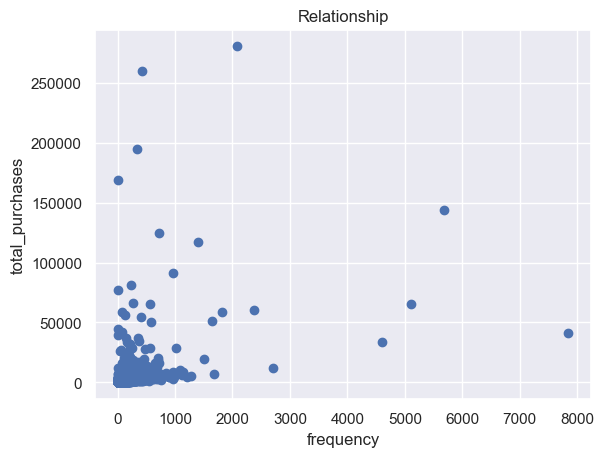

In [31]:
plt.scatter(df['frequency'],df['total_purchases'])
plt.xlabel('frequency')
plt.ylabel('total_purchases')
plt.title('Relationship')

####  Insight: most of frequency for each customer in range (1 ,1000)  are with total purchases  in range (1 ,50000)

In [32]:
x=df.iloc[:,1:]

In [33]:
x

,total_purchases,frequency,Recency
0,77183.60,1,326
1,4310.00,182,3
2,1797.24,31,76
3,1757.55,73,19
4,334.40,17,311
...,...,...,...
4333,180.60,10,278
4334,80.82,7,181
4335,178.05,12,8
4336,2094.88,756,4


In [34]:
x_scl=StandardScaler().fit_transform(x)

In [35]:
x_scl

array([[ 8.35866818e+00, -3.96577702e-01,  2.32938811e+00],
       [ 2.50966264e-01,  3.94648958e-01, -9.00588115e-01],
       [-2.85960063e-02, -2.65435162e-01, -1.70593488e-01],
       ...,
       [-2.08742313e-01, -3.48492104e-01, -8.50588483e-01],
       [ 4.51854273e-03,  2.90384290e+00, -8.90588188e-01],
       [-2.41412739e-02, -9.49498596e-02, -5.00591059e-01]])

## Dimensionality Reduction with PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
pc=PCA()

In [38]:
x_pc=pc.fit_transform(x_scl)

In [39]:
x_pc

array([[ 4.03743092,  5.3829015 , -5.49310292],
       [ 0.78560538, -0.64193456, -0.02313056],
       [-0.12480508, -0.21045165, -0.20126969],
       ...,
       [-0.01662326, -0.90880918, -0.24962054],
       [ 2.29243525, -0.30188858,  1.9695368 ],
       [ 0.12530104, -0.47636124, -0.13254924]])

In [40]:
pc.components_

array([[ 0.62779771,  0.66380443, -0.4064895 ],
       [ 0.40138186,  0.17135714,  0.89973848],
       [-0.66690526,  0.72801127,  0.15886144]])

In [41]:
pc.explained_variance_ratio_

array([0.5084963 , 0.30206662, 0.18943709])

In [42]:
pc.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [43]:
df_pca=pd.DataFrame(x_pc,columns=pc.get_feature_names_out())

In [44]:
df_pca

,pca0,pca1,pca2
0,4.037431,5.382901,-5.493103
1,0.785605,-0.641935,-0.023131
2,-0.124805,-0.210452,-0.201270
3,0.225994,-0.693610,-0.155213
4,-1.222848,1.828106,0.236037
...,...,...,...
4333,-1.119762,1.519083,0.172748
4334,-0.741145,0.639640,0.016510
4335,-0.016623,-0.908809,-0.249621
4336,2.292435,-0.301889,1.969537


## Determining Optimal Number of Clusters

In [45]:
from sklearn.cluster import KMeans

In [46]:
wcss=[]
for cluster in range(1,11):
    k=KMeans(n_clusters=cluster,init='k-means++',random_state=42)
    k.fit(x_scl)
    wcss.append(k.inertia_)
    

Text(0.5, 1.0, 'Elbow method to determine no. of clusters ')

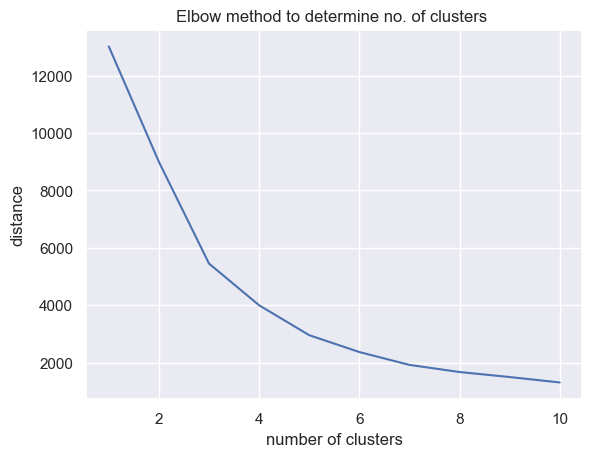

In [47]:
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('distance')
plt.title('Elbow method to determine no. of clusters ')

### From plot Elbow method :the optimal number of clusters =3 

### model using KMeans algorithm

In [48]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(x_scl)

KMeans(n_clusters=3, random_state=42)

In [49]:
preds=model.predict(x_scl)

In [50]:
preds

array([1, 0, 0, ..., 0, 0, 0])

In [51]:
model.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [52]:
df_preds=pd.DataFrame(preds,columns=['preds'])

In [53]:
x=x.join(df_preds)

In [54]:
x

,total_purchases,frequency,Recency,preds
0,77183.60,1,326,1
1,4310.00,182,3,0
2,1797.24,31,76,0
3,1757.55,73,19,0
4,334.40,17,311,1
...,...,...,...,...
4333,180.60,10,278,1
4334,80.82,7,181,1
4335,178.05,12,8,0
4336,2094.88,756,4,0


#### Now we create clusters and segment each customer to cluster 

### visulization of each cluster for total purchases ,frequency,Recency for each customer

In [54]:
# sns.pairplot(data=x.iloc[:,0:],hue='preds')

<Axes: ylabel='frequency'>

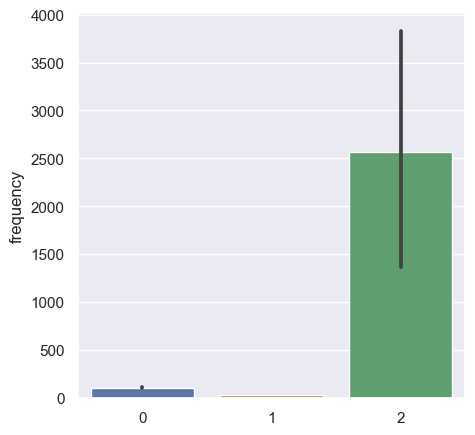

In [55]:
plt.figure(figsize=(5,5))
sns.barplot(x=preds,y='frequency',data=x)

#### Insight:from this plot most cluster of frequency for each customer cluster no. ( 2 )

<Axes: ylabel='Recency'>

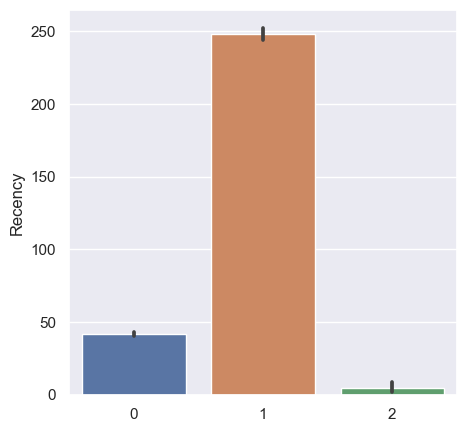

In [56]:
plt.figure(figsize=(5,5))
sns.barplot(x=preds,y='Recency',data=x)

#### Insight:from this plot most cluster of Recency  for each customer cluster no. ( 1 )

<Axes: ylabel='total_purchases'>

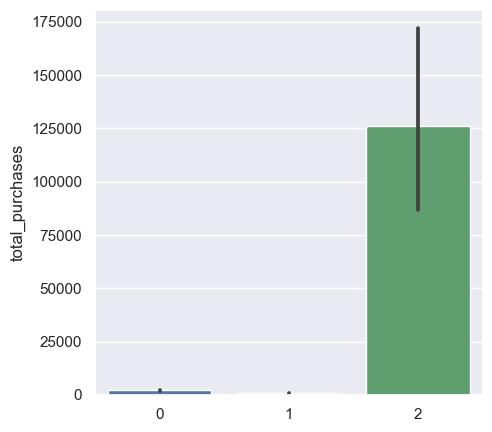

In [57]:
plt.figure(figsize=(5,5))
sns.barplot(x=preds,y='total_purchases',data=x)

#### Insight : from this plot most cluster of total_purchases  for each customer   cluster no.  ( 2 )

#### Cluster Profiles

In [58]:
df_seg=x.groupby('preds').agg({'total_purchases':'mean','Recency':'mean','frequency':'mean'}).round()
df_seg

,total_purchases,Recency,frequency
preds,,,
0,2029.0,42.0,103.0
1,637.0,248.0,28.0
2,126118.0,5.0,2565.0


## Evaluation

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
s_score=silhouette_score(x_scl,preds)

In [61]:
print('silhouette score for model =',s_score)

silhouette score for model = 0.6018678448358709


In [62]:
# pip install yellowbrick

### find silhouette score for model by visilization method

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer

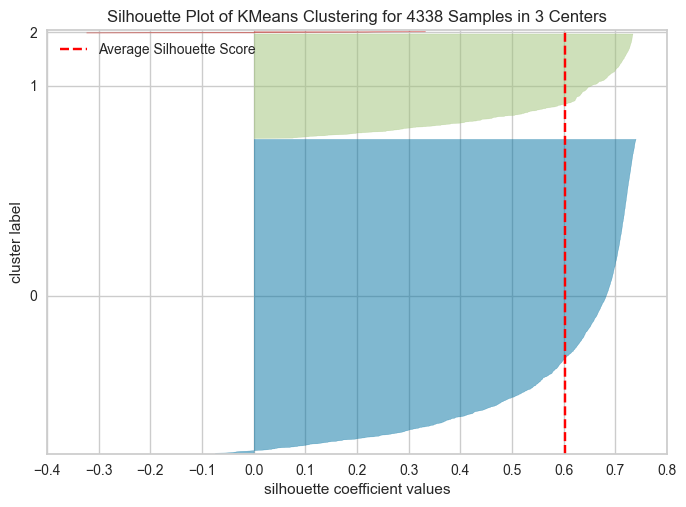

silhouette score for model 0.6018678448358709


In [64]:
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(x_scl)        
visualizer.show()    
print('silhouette score for model',visualizer.silhouette_score_)

## Personalization and Recommendations

In [72]:
x

,total_purchases,frequency,Recency,preds
0,77183.60,1,326,1
1,4310.00,182,3,0
2,1797.24,31,76,0
3,1757.55,73,19,0
4,334.40,17,311,1
...,...,...,...,...
4333,180.60,10,278,1
4334,80.82,7,181,1
4335,178.05,12,8,0
4336,2094.88,756,4,0


In [71]:
seg={ r'[0]': 'new'
     ,
    r'[1]':'lost',
    r'[2]':'best'}


In [73]:
x['segment'] = x['preds'].replace(seg,regex=True)

In [65]:
# x.join(df['CustomerID'])

In [74]:
x

,total_purchases,frequency,Recency,preds,segment
0,77183.60,1,326,1,1
1,4310.00,182,3,0,0
2,1797.24,31,76,0,0
3,1757.55,73,19,0,0
4,334.40,17,311,1,1
...,...,...,...,...,...
4333,180.60,10,278,1,1
4334,80.82,7,181,1,1
4335,178.05,12,8,0,0
4336,2094.88,756,4,0,0


In [75]:
len(x['preds'])

4338

In [76]:
for i in range(len(x['preds'])):
    if x['preds'][i]==0:
               x['segment'][i]='new'
    elif x['preds'][i]==1: 
               x['segment'][i]='lost'
               
    elif x['preds'][i]==2: 
                x['segment'][i]='best'

In [78]:
df_segment=pd.DataFrame(x['segment'])

In [79]:
df_segment

,segment
0,lost
1,new
2,new
3,new
4,lost
...,...
4333,lost
4334,lost
4335,new
4336,new


In [81]:
x

,total_purchases,frequency,Recency,preds,segment
0,77183.60,1,326,1,lost
1,4310.00,182,3,0,new
2,1797.24,31,76,0,new
3,1757.55,73,19,0,new
4,334.40,17,311,1,lost
...,...,...,...,...,...
4333,180.60,10,278,1,lost
4334,80.82,7,181,1,lost
4335,178.05,12,8,0,new
4336,2094.88,756,4,0,new


### Interpretation and Insights:
##### Interpretation of Results
* cluster 0  'new'     ----> Customers who transacted recently and have low frequency, with low amount of total purchases .
* cluster 1  'lost'    ----> Customers who transacted last purchase long ago,the least amount of total purchases andthe least .frequency

* cluster 2 ' best'   ---->Customers who transacted recently ,Most frequent and the highest amount of total purchases.
#####  Insights and Recommendation :
* cluster 0 ----> we need care of them and improve the relationship .

* cluster 1 ----> they already exited and we need know the reason thy left .

* cluster 2 ----> they are the target of new products , can increase company revenue by repeated advertising.
